In [2]:
# https://github.com/CSSEGISandData/COVID-19
# 全球/地區-國家/每日累積 確認 病例 (每日更新)
# https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

# 直接取用，做「資料梳理」
import pandas as pd
import matplotlib.pylab as plt

download_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
row = pd.read_csv(download_url, encoding = 'utf-8')

print(row)

                Province/State         Country/Region        Lat       Long  \
0                          NaN            Afghanistan  33.000000  65.000000   
1                          NaN                Albania  41.153300  20.168300   
2                          NaN                Algeria  28.033900   1.659600   
3                          NaN                Andorra  42.506300   1.521800   
4                          NaN                 Angola -11.202700  17.873900   
..                         ...                    ...        ...        ...   
259  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
260                        NaN            South Sudan   6.877000  31.307000   
261                        NaN         Western Sahara  24.215500 -12.885800   
262                        NaN  Sao Tome and Principe   0.186360   6.613081   
263                        NaN                  Yemen  15.552727  48.516388   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1

In [45]:
import pandas as pd
import matplotlib.pylab as plt

# download_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
row = pd.read_csv('time_series_covid19_confirmed_global.csv', encoding = 'utf-8')

# row.info()
# row.head()
# 全世界
row.loc['264','1/22/20':]= row.sum(axis=0)
row.loc['264','Country/Region']='Global_total'
# 全世界新增
# row.info()

# 新增
row.loc['265','1/22/20':] = 0 
row.loc['265','Country/Region']='Global_add'
#row.iloc[265,5:101]
for i in range(5,101):
    row.iloc[265,i] = row.iloc[264,i] - row.iloc[264,i-1]
# 整數
row.loc[:,'1/22/20':]=row.loc[:,'1/22/20':].astype(int)
# 另存
row.to_csv('./covid19_confirmed_global.csv')


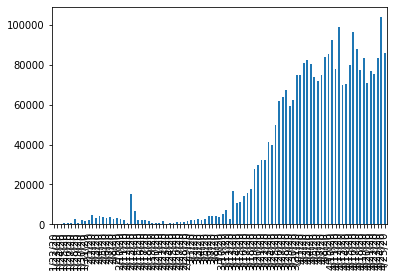

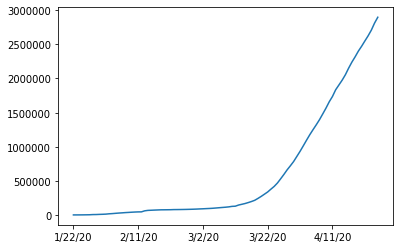

,Unnamed: 0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703
1,1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736
2,2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517
3,3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743
4,4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
263,263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
264,264,NaN,Global_total,NaN,NaN,555,654,941,1434,2118,...,2317339,2400843,2471759,2548821,2624107,2707742,2811603,2897624,2972363,3041764


In [57]:
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv('covid19_confirmed_global.csv')
df
data_add = df.loc[265, '1/22/20':'4/25/20']
data_total = df.loc[264, '1/22/20':'4/25/20']
#data.info()
#data = data.set_index('date')
data_add.plot(kind='bar')
plt.show()
data_total.plot(kind='line')
plt.show()
df